In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
cnt=0
for dirname, _, filenames in os.walk('/kaggle/input/global-wheat-detection/train'):
    for filename in filenames:
        cnt+=1
        #print(os.path.join(dirname, filename))
print ('cnt',cnt)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

cnt 3422


In [2]:
train_df = pd.read_csv('/kaggle/input/global-wheat-detection/train.csv')
train_df.head(20)

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1
5,b6ab77fd7,1024,1024,"[569.0, 382.0, 119.0, 111.0]",usask_1
6,b6ab77fd7,1024,1024,"[52.0, 602.0, 82.0, 45.0]",usask_1
7,b6ab77fd7,1024,1024,"[627.0, 302.0, 122.0, 75.0]",usask_1
8,b6ab77fd7,1024,1024,"[412.0, 367.0, 68.0, 82.0]",usask_1
9,b6ab77fd7,1024,1024,"[953.0, 220.0, 56.0, 103.0]",usask_1


In [3]:
sample_image_id='b6ab77fd7'
sample_train_data = train_df.loc[train_df['image_id']==sample_image_id]
sample_train_data

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1
5,b6ab77fd7,1024,1024,"[569.0, 382.0, 119.0, 111.0]",usask_1
6,b6ab77fd7,1024,1024,"[52.0, 602.0, 82.0, 45.0]",usask_1
7,b6ab77fd7,1024,1024,"[627.0, 302.0, 122.0, 75.0]",usask_1
8,b6ab77fd7,1024,1024,"[412.0, 367.0, 68.0, 82.0]",usask_1
9,b6ab77fd7,1024,1024,"[953.0, 220.0, 56.0, 103.0]",usask_1


sample_image /kaggle/input/global-wheat-detection/train/b6ab77fd7.jpg


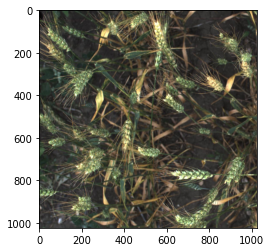

In [4]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
sample_image= f'/kaggle/input/global-wheat-detection/train/{sample_image_id}.jpg'
print ('sample_image',sample_image)
img= cv2.imread(sample_image)

img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
bbox=sample_train_data[['bbox']]
bbox.head()

,bbox
0,"[834.0, 222.0, 56.0, 36.0]"
1,"[226.0, 548.0, 130.0, 58.0]"
2,"[377.0, 504.0, 74.0, 160.0]"
3,"[834.0, 95.0, 109.0, 107.0]"
4,"[26.0, 144.0, 124.0, 117.0]"


s [834.0, 222.0, 56.0, 36.0]
<class 'str'>
[834. 222.  56.  36.]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


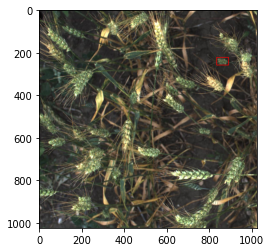

In [6]:
bbox1=bbox.iloc[0].values
s= bbox1[0]
print('s',s)
print(type(s))
#print (bbox1[:2])
#print(bbox1[0])
a = np.fromstring(s[1:-1], dtype=np.float, sep=',')
print(a)

xmin,ymin,xmax,ymax= int(a[0]), int(a[1]), int(a[0]) + int(a[2]), int(a[1]) + int(a[3])
rect_img = cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(255,0,0), 2)
plt.imshow(rect_img)

s [569.0, 382.0, 119.0, 111.0]
<class 'str'>
[569. 382. 119. 111.]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


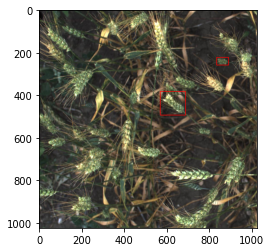

In [7]:
bbox1=bbox.iloc[5].values
s= bbox1[0]
print('s',s)
print(type(s))
#print (bbox1[:2])
#print(bbox1[0])
a = np.fromstring(s[1:-1], dtype=np.float, sep=',')
print(a)

xmin,ymin,xmax,ymax= int(a[0]), int(a[1]), int(a[0]) + int(a[2]), int(a[1]) + int(a[3])
rect_img = cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(255,0,0), 2)
plt.imshow(rect_img)

s [30.0, 70.0, 126.0, 133.0]
<class 'str'>
[ 30.  70. 126. 133.]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


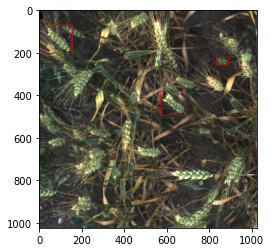

In [8]:
bbox1=bbox.iloc[10].values
s= bbox1[0]
print('s',s)
print(type(s))
#print (bbox1[:2])
#print(bbox1[0])
a = np.fromstring(s[1:-1], dtype=np.float, sep=',')
print(a)

xmin,ymin,xmax,ymax= int(a[0]), int(a[1]), int(a[0]) + int(a[2]), int(a[1]) + int(a[3])
rect_img = cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(255,0,0), 2)
plt.imshow(rect_img)

s [539.0, 58.0, 58.0, 130.0]
<class 'str'>
[539.  58.  58. 130.]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


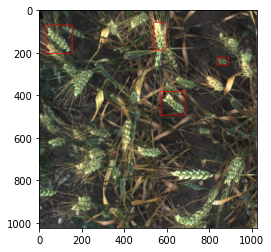

In [9]:
bbox1=bbox.iloc[15].values
s= bbox1[0]
print('s',s)
print(type(s))
#print (bbox1[:2])
#print(bbox1[0])
a = np.fromstring(s[1:-1], dtype=np.float, sep=',')
print(a)

xmin,ymin,xmax,ymax= int(a[0]), int(a[1]), int(a[0]) + int(a[2]), int(a[1]) + int(a[3])
rect_img = cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(255,0,0), 2)
plt.imshow(rect_img)

https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html

Defining the Dataset
The reference scripts for training object detection, instance segmentation and person keypoint detection allows for easily supporting adding new custom datasets. The dataset should inherit from the standard torch.utils.data.Dataset class, and implement __len__ and __getitem__.

The only specificity that we require is that the dataset __getitem__ should return:

image: a PIL Image of size (H, W)

target: a dict containing the following fields

boxes (FloatTensor[N, 4]): the coordinates of the N bounding boxes in [x0, y0, x1, y1] format, ranging from 0 to W and 0 to H

labels (Int64Tensor[N]): the label for each bounding box. 0 represents always the background class.

image_id (Int64Tensor[1]): an image identifier. It should be unique between all the images in the dataset,
    and is used during evaluation

area (Tensor[N]): The area of the bounding box. This is used during evaluation with the COCO metric, 
    to separate the metric scores between small, medium and large boxes.

iscrowd (UInt8Tensor[N]): instances with iscrowd=True will be ignored during evaluation.

(optionally) masks (UInt8Tensor[N, H, W]): The segmentation masks for each one of the objects

(optionally) keypoints (FloatTensor[N, K, 3]): For each one of the N objects, 
    it contains the K keypoints in [x, y, visibility] format, defining the object. visibility=0 means that the keypoint is not visible. Note that for data augmentation, the notion of flipping a keypoint is dependent on the data representation, and you should probably adapt references/detection/transforms.py for your new keypoint representation

https://datascience.stackexchange.com/questions/92309/how-to-interpret-fast-rcnn-metrics

{'loss_classifier': tensor(0.7555, device='cuda:0', grad_fn=<NllLossBackward>),
 'loss_box_reg': tensor(0.2380, device='cuda:0', grad_fn=<DivBackward0>),
 'loss_objectness': tensor(6.4424, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>),
 'loss_rpn_box_reg': tensor(0.3896, device='cuda:0', grad_fn=<DivBackward0>)}
    
  Region Proposal Network is a subcomponent of the Fast RCNN and Faster RCNN architectures. It proposes candidate boxes and scores whether there is an object in this regions. RPN loss and objectness loss must be losses of this predictions.

Regressor loss is the loss of the prediction of bounding box coordinates, and classifier loss is the loss of prediction of object classes in bounding boxes.

IOU is acronym for intersection over union, and it gives how much bounding boxes are overlapped. In RPN it is calculated between suggested boxes(anchors), and ground truths. Higher IOU scores means suggested box includes an object of interest.

Average precision is the average of the areas under the precision recall curve for each of the object classes.

In [10]:
train_df['image_id'].unique()

array(['b6ab77fd7', 'b53afdf5c', '7b72ea0fb', ..., 'a5c8d5f5c',
       'e6b5e296d', '5e0747034'], dtype=object)

In [11]:
train_df['image_id'].shape

(147793,)

In [12]:
train_df['image_id'].shape[0]

147793

In [13]:
len(train_df['image_id'])

147793

In [14]:
from torchvision import transforms

#my_tranforms = transforms.Compose ([transforms.ToTensor()])
my_tranforms = transforms.Compose ([ transforms.ToPILImage(), transforms.ToTensor()])

In [15]:
#https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html

import os
import numpy as np
import torch
from PIL import Image
import cv2


class WheatDataset(torch.utils.data.Dataset):
    def __init__(self,dataframe, image_dir, transforms=None):
        self.dataframe = dataframe
        self.transforms = transforms
        self.image_dir = image_dir
        # load all image files, sorting them to
        # ensure that they are aligned
        self.image_ids = self.dataframe['image_id'].unique()
        #self.imgs = list(sorted(os.listdir(os.path.join(root, "PNGImages"))))
        
    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        
        curr_image_id = self.image_ids[idx]
        curr_data = self.dataframe[self.dataframe['image_id'] == curr_image_id]
        
        #print ('curr_image_id',curr_image_id)
        #print ('curr_data',curr_data)
        
#         image = cv2.imread(f'{self.image_dir}/{curr_image_id}.jpg')
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
#         image /= 255.0
        
        img_path = f'{self.image_dir}/{curr_image_id}.jpg'
        img = Image.open(img_path).convert("RGB")
        # convert the PIL Image into a numpy array
        img = np.array(img)
        
        bbox_data= curr_data['bbox']
        bbox_data = bbox_data.reset_index(drop=True)
        #print ('bbox_data',bbox_data)
        #print ('type bbox',type(bbox_data))
        
        num_objs =len(curr_data)
        
        #print ('num_objs',num_objs)
        # get bounding box coordinates for each mask
        boxes = []
        for i in range(num_objs-1):
            #print ('i',i)
            s= bbox_data[i]
            #print ('s',s)
            a = np.fromstring(s[1:-1], dtype=np.float, sep=',')
            #print(a)

            xmin,ymin,xmax,ymax= int(a[0]), int(a[1]), int(a[0]) + int(a[2]), int(a[1]) + int(a[3])
            boxes.append([xmin, ymin, xmax, ymax])

        # convert everything into a torch.Tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        
        #print ('boxes',boxes)
        #print ('boxes size',boxes.size())
        
        labels = torch.ones((num_objs,), dtype=torch.int64)
        #print ('labels',labels)
        
        image_id = torch.tensor([idx])
        #print ('image_id',image_id)
        
        boxes_size = boxes.size()
        
        #print ('boxes_size dimension',boxes_size[1])
        
        if len(boxes_size) !=2:
            area =0
        elif boxes_size[1] != 4 :
            area =0
        else:
            area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        #print ('area',area)
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)
        
        #print ('iscrowd',iscrowd)
        
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd
        
        if self.transforms is not None:
            img = self.transforms(img)

        return img, target
        
        
        



In [16]:
# train_image_dir = f'/kaggle/input/global-wheat-detection/train/'
# train_ds = WheatDataset(train_df, train_image_dir,my_tranforms)
# train_data_loader = torch.utils.data.DataLoader(train_ds, batch_size=1 )
# images,targets = next(iter(train_data_loader))

# print ('images type',type(images))
# print ('targets type',type(targets))



In [17]:
def collate_fn(batch):
    return tuple(zip(*batch))



train_image_dir = f'/kaggle/input/global-wheat-detection/train/'
train_ds = WheatDataset(train_df, train_image_dir,my_tranforms)
train_data_loader = torch.utils.data.DataLoader(train_ds, batch_size=10,collate_fn=collate_fn )
images,targets = next(iter(train_data_loader))

print ('images type',type(images))
print ('targets type',type(targets))

#output = model(images,targets) 
#print ('output',output)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


images type <class 'tuple'>
targets type <class 'tuple'>


In [18]:

import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# load a model pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# replace the classifier with a new one, that has
# num_classes which is user-defined
num_classes = 2  # 1 class (wheat) + background
# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features
# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)





In [19]:
images,targets = next(iter(train_data_loader))
print ('images type',type(images))
print ('targets type',type(targets))

sample_img= images[0]

print ('sample_img size',sample_img.size())

#print ('image_ids[0]',image_ids[0])

images = list(image for image in images)
#targets = [{k: v for k, v in t.items()} for t in targets]
targets = [{k: v for k, v in t.items()} for t in targets]
output = model(images,targets)   # Returns losses and detections
print ('output',output)
print ('type output',type(output))




/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


images type <class 'tuple'>
targets type <class 'tuple'>
sample_img size torch.Size([3, 1024, 1024])
output {'loss_classifier': tensor(0.7810, grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(0.6016, grad_fn=<DivBackward0>), 'loss_objectness': tensor(3.9721, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(0.1555, grad_fn=<DivBackward0>)}
type output <class 'dict'>


# Training

In [20]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


model.to(device)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
# lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)
lr_scheduler = None



In [21]:
import time 
start = time.time()
epochs = 3

for e in range(epochs):
    
    running_loss = 0
    cnt = 0
    
    for images,targets in train_data_loader:
        cnt+=1 
        
        #print ('images type',type(images))
        #print ('targets type',type(targets))
        #print ('cnt',cnt)

        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        output_loss = model(images,targets)   # Returns losses and detections
        
        losses = sum(loss for loss in output_loss.values())
        loss_value = losses.item()


        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        running_loss += loss_value
        
        if cnt%100 == 99:
            print (f"epoch {e} , cnt {cnt}, running_loss {running_loss}")
            print ('output_loss ',output_loss)
            running_loss = 0
            
            
        if cnt > 200:
            print ('output_loss after 200',output_loss)
            break
        
          
        
       
            
end = time.time()
print ('end',end)
print('time taken',end - start)
print('time taken minutes',(end - start)/60)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch 0 , cnt 99, running_loss 114.77317702770233
output_loss  {'loss_classifier': tensor(0.2701, device='cuda:0', grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(0.5410, device='cuda:0', grad_fn=<DivBackward0>), 'loss_objectness': tensor(0.0611, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(0.0786, device='cuda:0', grad_fn=<DivBackward0>)}
epoch 0 , cnt 199, running_loss 87.15663558244705
output_loss  {'loss_classifier': tensor(0.2047, device='cuda:0', grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(0.4391, device='cuda:0', grad_fn=<DivBackward0>), 'loss_objectness': tensor(0.0585, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(0.0749, device='cuda:0', grad_fn=<DivBackward0>)}
output_loss after 200 {'loss_classifier': tensor(0.1891, device='cuda:0', grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(0.4048, device='cuda:0', grad_fn=<DivBackward0>), 'loss_objectness': t

In [22]:
output_loss

{'loss_classifier': tensor(0.1787, device='cuda:0', grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0.3885, device='cuda:0', grad_fn=<DivBackward0>),
 'loss_objectness': tensor(0.0558, device='cuda:0',
        grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_rpn_box_reg': tensor(0.0704, device='cuda:0', grad_fn=<DivBackward0>)}